In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
conn = sqlite3.connect(r'C:\Users\Owner\dev\algobetting\infra\data\db\algobetting.db')

df = pd.read_sql_query("SELECT * FROM fbref_team_goals_features", conn)

df

,match_url,match_date,season,team,opp_team,is_home,goals,opp_goals,xg,opp_xg,...,weighted_attack_corner_kicks,weighted_defense_opp_shots_opp,weighted_defense_opp_shots_on_target_opp,weighted_defense_opp_xg_opp,weighted_defense_opp_npxg_opp,weighted_defense_opp_touches_att_pen_area_opp,weighted_defense_opp_touches_att_3rd_opp,weighted_defense_opp_touches_opp,weighted_defense_opp_pens_won_opp,weighted_defense_opp_corner_kicks_opp
0,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Leicester City,Newcastle Utd,1,0,3,0.5,3.3,...,3.423464,12.906852,4.355476,1.303009,1.251797,24.197442,155.426749,602.362132,0.065146,4.995137
1,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Newcastle Utd,Leicester City,0,3,0,3.3,0.5,...,5.419707,16.130546,5.494694,1.887059,1.825313,31.816265,195.700380,690.196090,0.073388,6.049093
2,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Manchester Utd,Manchester City,1,0,0,0.9,0.5,...,5.163240,9.464969,3.624739,1.283831,1.218377,18.396063,101.868168,517.512371,0.081817,3.457143
3,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Manchester City,Manchester Utd,0,0,0,0.5,0.9,...,6.251727,12.012086,4.125325,1.549812,1.440821,22.861867,150.093587,588.030979,0.103199,5.190624
4,https://fbref.com/en/matches/f671e515/Tottenha...,2025-04-06 00:00:00,2024-2025,Tottenham,Southampton,1,3,1,2.1,1.0,...,6.723279,17.076964,6.432989,2.281046,2.105396,32.140872,176.702024,626.645503,0.143379,5.438184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,https://fbref.com/en/matches/3a6836b4/Burnley-...,2023-08-11 00:00:00,2023-2024,Manchester City,Burnley,0,3,0,2.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,https://fbref.com/en/matches/083c4444/Newcastl...,2024-02-17 00:00:00,2023-2024,Newcastle Utd,Bournemouth,1,2,2,2.2,2.2,...,5.114407,13.080087,4.742369,1.499370,1.370379,26.725141,162.016047,661.559442,0.158885,5.137582
1375,https://fbref.com/en/matches/083c4444/Newcastl...,2024-02-17 00:00:00,2023-2024,Bournemouth,Newcastle Utd,0,2,2,2.2,2.2,...,6.928871,15.162274,5.495664,2.076930,1.882939,26.951161,163.644374,600.555128,0.228473,5.342645
1376,https://fbref.com/en/matches/99020abf/Arsenal-...,2024-02-04 00:00:00,2023-2024,Arsenal,Liverpool,1,3,0,3.7,0.4,...,7.558228,10.404560,2.958522,1.081275,1.068464,20.421832,119.669965,558.464633,0.018301,4.781427


In [36]:
na_count = df.isna().sum()
rows_with_na = df[df.isna().any(axis=1)]
df.dropna(inplace=True)

X = df.drop(["match_url", "match_date", "season", "team", "opp_team", "goals", "opp_goals", "xg", "opp_xg"], axis=1)
y = df["goals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get feature names (assuming X_train is a DataFrame)
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Create a coefficient summary DataFrame
coef_summary = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

# Add the intercept
coef_summary = pd.concat([
    pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model.intercept_]}),
    coef_summary
])

# Sort by absolute coefficient value to see most important features
coef_summary['Abs_Coefficient'] = np.abs(coef_summary['Coefficient'])
coef_summary_sorted = coef_summary.sort_values('Abs_Coefficient', ascending=False)

# Display the sorted coefficients
print("Coefficient Summary:")
print(coef_summary_sorted[['Feature', 'Coefficient']])
print("\nModel Performance Metrics:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')

Coefficient Summary:
                                          Feature  Coefficient
12                    weighted_defense_opp_xg_opp     2.316318
17              weighted_defense_opp_pens_won_opp    -2.282474
13                  weighted_defense_opp_npxg_opp    -1.751895
0                                       Intercept    -0.996599
8                        weighted_attack_pens_won     0.899684
3                              weighted_attack_xg     0.336085
0                                         is_home     0.213355
4                            weighted_attack_npxg    -0.192343
10                 weighted_defense_opp_shots_opp     0.041918
1                           weighted_attack_shots     0.040853
9                    weighted_attack_corner_kicks    -0.039460
2                 weighted_attack_shots_on_target    -0.036917
11       weighted_defense_opp_shots_on_target_opp    -0.021751
18          weighted_defense_opp_corner_kicks_opp    -0.014293
5            weighted_attack_touch

In [45]:
import statsmodels.api as sm
# Convert everything to numeric format first
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
y_train_numeric = pd.to_numeric(y_train, errors='coerce')

# Check for and handle missing values created by coercion
print(f"Missing values after conversion - X_train: {X_train_numeric.isna().sum().sum()}, y_train: {y_train_numeric.isna().sum()}")

# Fill or drop NA values
X_train_numeric = X_train_numeric.fillna(0)  # or use .dropna()
y_train_numeric = y_train_numeric.fillna(0)  # or use .dropna()

# Now try the statsmodels approach again
X_train_sm = sm.add_constant(X_train_numeric)
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_sm = sm.add_constant(X_test_numeric)

# Fit the model
model_sm = sm.OLS(y_train_numeric, X_train_sm).fit()

# Print the summary
print(model_sm.summary())

Missing values after conversion - X_train: 0, y_train: 0
                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     8.859
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           7.90e-24
Time:                        15:33:56   Log-Likelihood:                -1709.2
No. Observations:                1081   AIC:                             3458.
Df Residuals:                    1061   BIC:                             3558.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

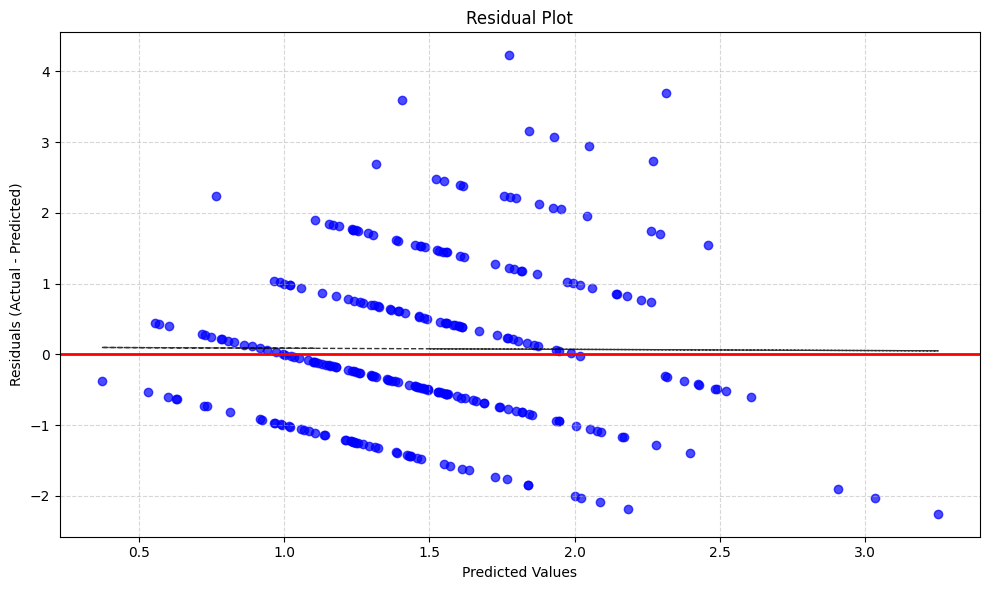

Mean of residuals: 0.0789
Standard deviation of residuals: 1.1987


In [40]:
# Create a residual plot
residuals = y_test.astype(float) - y_pred.astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.5)

# Add a trend line for the residuals (should be flat ideally)
try:
    z = np.polyfit(y_pred, residuals, 1)
    p = np.poly1d(z)
    plt.plot(y_pred, p(y_pred), "k--", alpha=0.8, linewidth=1)
except:
    pass

plt.tight_layout()
plt.show()

# Add some statistics about the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
print(f"Mean of residuals: {mean_residual:.4f}")
print(f"Standard deviation of residuals: {std_residual:.4f}")